# Turkey

### From turkey cooking article:
http://www.greenbuildingadvisor.com/sites/default/files/Modeling%20Heat%20Transfer%20of%20Turkeys.pdf data from turkey
 118°C oven temp, with the oven at room temperature starting their experiment
 thermal conductivity 0.461 W/m K
 surface heat transfer coefficient of 19.252 W/m2K

### From thermal properities of food pdf (in google doc): 
Turkey specific heat above freezing 3.53 kJ/(kg·K)
Turkey, breast 0.496 W/(m·K) thermal conductivity at 3 degrees C

****put math in here****

In [14]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [15]:
def make_system(params, T_oven, T_init, t_end):
    """Make a system object for the turkey model.
    inner is inner temperature of turkey
    outer is outer temperature of turkey
    
    params is the r and C values for thermal compartments
    t_end is when the turkey is taken out of the oven
    )
    
    returns: System object
    """
    #initial temperatures are of the temperature of pre-heated oven
    init = State(T_inner=T_init, T_outer=T_init)

    return System(init=init, t0=0, t_end=t_end, T_oven=T_oven,
                  params = params)

In [50]:
def slope_func(state, t, system):
    """Makes the differential equations.
    
    state: State (t_inner, t_outer)
    t: time
    system: System object
    
    returns: didt, dodt
    """
    
    unpack(system)
    r_outer, r_inner, c_inner, c_outer = params
    T_inner, T_outer = state
    
    o_flux = (T_oven-T_outer)/r_outer
    i_flux = (T_outer-T_inner)/r_inner
    
    dodt = (o_flux-i_flux)/c_outer
    
    #compute inner temperature change
    didt = i_flux/c_inner
    
    print(o_flux, i_flux)
    print(dodt, didt)

    return didt, dodt

In [51]:
def plot_results(inner, outer):
    """Plot the inner and outer temperatures of the Turkey
    
    inner: TimeSeries
    outer: TimeSeries
    
    """
    inner_f=convert_k_to_f(inner)
    outer_f=convert_k_to_f(outer)
    plot(inner_f, '-', label='Inner Turkey Temp')
    plot(outer_f, '-', label='Outer TurkeyTemp')
    
    decorate(xlabel='Minutes',
             ylabel='Temperature')

In [52]:
def convert_k_to_f(k):
    return (k-273)*(9/5) + 32

In [53]:
params = Params(
    r_outer = 0.043, #Km^2/W
    r_inner = 0.282, #Km^2/W
    c_inner = 10450, #J/K
    c_outer = 5330, #J/K
    )

,values
r_outer,0.043
r_inner,0.282
c_inner,10450.000
c_outer,5330.000


In [54]:
system=make_system(params,391,275,500)
results, details=run_ode_solver(system,slope_func,max_step=1)


2697.6744186046512 0.0
0.5061302849164449 0.0
2607.230527987768 13.79108970399286
0.4865740034303518 0.0013197215027744363
2696.7853377588913 0.13556906513364209
0.5059380429068964 1.29731162807313e-05
2696.3411772451577 0.203291759026581
0.5058420047816381 1.94537568446489e-05
2694.12079420953 0.5418369416921573
0.5053619056787688 5.185042504231171e-05
2693.7262778116888 0.6019872098840039
0.505276602364316 5.7606431567847265e-05
2693.2332294105413 0.6771592385965225
0.505169994403742 6.47999271384232e-05
2693.233232893804 0.677158669537661
0.5051699951640275 6.479987268302976e-05
2690.883605009321 1.0353893044960045
0.5046619541660083 9.908031621971336e-05
2689.711449421138 1.2140719186975486
0.5044085136027092 0.00011617913097584198
2683.8535772536175 2.107012042392813
0.5031419446925375 0.00020162794664046056
2682.8136757234856 2.265513156439714
0.5029171036711155 0.00021679551736265206
2681.514516227056 2.4635227378345665
0.5026362089097977 0.0002357438026635949
2681.514580850639 

2220.0765471653344 72.24625954535658
0.4029700352007463 0.006913517659842735
2220.0765988538697 72.24625110146887
0.4029700464826268 0.006913516851815203
2218.202319567904 72.52714225723537
0.4025656993078177 0.006940396388252189
2217.2672956950214 72.66724377125338
0.4023639872277239 0.006953803231698888
2212.5944890254677 73.3673752821333
0.40135593128392766 0.0070208014624051004
2211.764960068357 73.49164925602918
0.40117698139068064 0.007032693708710926
2210.728619853433 73.64689883507755
0.4009534185775526 0.007047550127758618
2210.7286712802634 73.64689043395303
0.40095342980230964 0.007047549323823257
2208.863771606764 73.92625630663294
0.4005511285741334 0.0070742829001562615
2207.933426834581 74.06559692796921
0.4003504371306964 0.007087616930906144
2203.284003966693 74.76192588704932
0.3993474818160682 0.0071542512810573505
2202.4586260974734 74.88552483718496
0.3991694373846695 0.007166078931788034
2201.4274718531606 75.03993110853317
0.3989470057682228 0.007180854651534274


1866.671801303517 124.72306000447384
0.32681965127561785 0.011935221053059697
1865.9963248421284 124.82229493630605
0.3266743020461205 0.011944717218785268
1865.152443030013 124.94626322772426
0.3264927166608422 0.011956580213179356
1865.1524847944947 124.94625640545695
0.3264927257765549 0.011956579560330808
1863.6339139769293 125.16933168646139
0.32616596290627914 0.011977926477173339
1862.876338373864 125.28059157979288
0.3260029543703698 0.011988573356917978
1859.090329308618 125.83658747524227
0.32518831929331626 0.01204177870576481
1858.4182245041825 125.9352747078307
0.3250437054026926 0.012051222460079492
1857.5785549168581 126.05855875849078
0.3248630386788682 0.012063019976889069
1857.578596469884 126.05855197077601
0.3248630477484255 0.012063019327346986
1856.0676055501242 126.28039596256392
0.3245379380089231 0.01208424841747023
1855.3138112458573 126.39104162428553
0.3243757541503887 0.012094836519070387
1851.5466992194997 126.94396790617182
0.3235652403964968 0.0121477481

1582.440452838685 166.0099355036807
0.2657468137589126 0.01588611823001729
1581.823208553794 166.09841341268987
0.26561440809401576 0.015894585015568407
1578.7385052106345 166.54055669884596
0.2649527107902042 0.015936895377879998
1578.1908961027054 166.61903301246056
0.26483524635839495 0.015944405072962735
1577.5067595044832 166.71706756565118
0.2646884975494994 0.015953786369918774
1577.5067932503707 166.7170620536416
0.26468850491495854 0.01595378584245374
1576.2756839251854 166.89346965582052
0.26442443044453373 0.0159706669527101
1575.6615110476112 166.98144929022362
0.2642926945135812 0.01597908605648073
1572.592157062387 167.42110245755796
0.26363434420353266 0.016021158129909854
1572.0472727707802 167.49913672993614
0.26351747392886377 0.016028625524395802
1571.3665402970612 167.59661904126497
0.2633714674025884 0.016037953975240667
1571.366573872093 167.59661355717358
0.2633714747307541 0.016037953450447232
1570.1415902686945 167.77202740205328
0.2631087359974937 0.0160547394

1358.312659109239 197.7087845692164
0.2177493198011299 0.018919500915714486
1357.8068952632455 197.77918955702572
0.21764122058278043 0.01892623823512208
1355.2793154356598 198.13101375402704
0.21710099468698552 0.018959905622394933
1354.8306068465315 198.1934568049091
0.21700509381643945 0.018965881033962594
1354.2700270894597 198.27146101853032
0.21688528444107494 0.01897334555201247
1354.270054634567 198.27145651973856
0.21688529045306348 0.018973345121506082
1353.2612858417626 198.41181960153398
0.2166696934784669 0.018986776995362102
1352.7580295690632 198.48181840664847
0.21656214093103465 0.018993475445612293
1350.2429813402425 198.83161271383594
0.21602464702183988 0.01902694858505607
1349.7964973598293 198.8936954231207
0.21592923113259072 0.01903288951417423
1349.2386968161218 198.97124946250477
0.21581002764608198 0.01904031095334974
1349.2387242217696 198.97124498650078
0.21581003362763018 0.019040310525023998
1348.2349566235011 199.11079798160904
0.21559552694969833 0.0190

0.19463728607004913 0.020348419251980464
1249.6554356197612 212.69590716414555
0.19455150627685094 0.020353675326712492
1249.152858907699 212.7645203150599
0.19444434119936946 0.020360241178474632
1249.1528835424378 212.76451629182503
0.19444434657609996 0.020360240793476078
1248.248491232782 212.88798019663525
0.19425150300865793 0.020372055521209114
1247.7973041431326 212.9495488578476
0.19415530117922797 0.02037794725912417
1245.54247169098 213.25721369952876
0.19367453245618219 0.020407388870768303
1245.1421812053507 213.31181768262329
0.19358918640201264 0.020412614132308448
1244.6420903982296 213.38002856225964
0.19348256319624202 0.020419141489211447
1244.6421149082446 213.38002455940472
0.19348256854574855 0.020419141106163132
1243.7421959847754 213.50276457886557
0.1932907000761557 0.020430886562570867
1243.2932404859632 213.56397213067623
0.19319498468204258 0.02043674374456232
1241.0495604109085 213.86983233616243
0.19271664691833884 0.0204660126637476
1240.651249695049 213.

1104.6022117191644 232.17482294839968
0.16368243691759188 0.022217686406545423
1104.2639092716686 232.21940435316412
0.16361060129803084 0.022221952569680778
1103.8412604017342 232.27509405048514
0.16352085672631314 0.02222728172731915
1103.841281026795 232.27509068243253
0.16352086122783538 0.02222728140501747
1103.0807188815488 232.37529889507286
0.16335936585112118 0.022236870707662476
1102.7012828428738 232.42526649765946
0.16327880231617528 0.02224165229642674
1100.8050263489522 232.67495532634615
0.16287618593294673 0.02226554596424365
1100.4683902711133 232.71926755675528
0.1628047134548514 0.02226978636906749
1100.047823204501 232.77462097536394
0.16271542255706134 0.022275083346924778
1100.0478437251404 232.77461762437386
0.16271542703579112 0.02227508302625587
1099.2910277854392 232.87422070523158
0.1625547480450671 0.022284614421553262
1098.913460577749 232.92388643950147
0.16247459177077814 0.02228936712339727
1097.0265435694155 233.17206668909006
0.16207401067173083 0.0223

0.1431447600905748 0.02342074647085064
1007.0425823213368 244.83171126834634
0.14300391576979182 0.023428871891707784
1006.7104245065248 244.87404773348874
0.14293365417880602 0.023432923228085045
1005.050441017742 245.08560016174982
0.1425825217365839 0.023453167479593286
1004.7557481406407 245.123142530076
0.14252018866989957 0.023456760050724976
1004.3875809120162 245.17003838340014
0.14244231567141016 0.023461247692191402
1004.387598804635 245.17003546182679
0.14244231957651188 0.023461247412615002
1003.7250763879996 245.25441920095028
0.14230218708950268 0.02346932241157419
1003.3945484310686 245.296492819858
0.14223228060247853 0.023473348595201723
1001.7427101603316 245.50673168172318
0.14188292279148376 0.02349346714657638
1001.4494632231721 245.54404086982893
0.1418209047567248 0.023497037403811382
1001.0831024142387 245.5906454120257
0.14174342532874543 0.0235014971686149
1001.0831202162716 245.59064250525404
0.14174342921407457 0.023501496890454932
1000.4238484524845 245.674

897.8618538397388 258.41986799680734
0.11997035381668507 0.024729173970986347
897.8618688201424 258.41986555108497
0.11997035708612709 0.02472917373694593
897.3038671592765 258.4874124896306
0.11985299337141575 0.024735637558816324
897.0254804413044 258.52108716033683
0.1197944452684742 0.02473886001534324
895.6342181388254 258.68935254331103
0.11950185095600645 0.024754961965867083
895.3872286851168 258.7192107403229
0.1194499095581227 0.02475781920960028
895.0786575770194 258.75650679376923
0.11938501890867734 0.02476138820993007
895.0786724815819 258.7565043604392
0.11938502216156523 0.02476138797707552
894.5233933087369 258.8236133208538
0.11926825140485613 0.024767809887163043
894.2463647320882 258.85706950903955
0.11920999910376147 0.024771011436271726
892.8618897447884 259.0242430330903
0.11891888306035614 0.024787008902688066
892.6161051765682 259.0539074072726
0.11886720408429562 0.02478984759878207
892.3090393379708 259.09096131889896
0.11880264127937558 0.024793393427645832


827.7761141189001 266.71770455875395
0.10526424194374225 0.025523225316627172
827.558551137922 266.7428336336609
0.10521870872500208 0.025525630012790516
827.2867426729501 266.7742216228561
0.10516182383679062 0.0255286336481202
827.2867557349147 266.7742194906012
0.10516182668748844 0.02552863344407667
826.7976309596246 266.8306969326176
0.10505946229399757 0.025534037983982547
826.5536041996188 266.85884966777513
0.10500839672267237 0.025536732025624415
825.3340558979708 266.99951937792633
0.10475319634522408 0.025550193241906827
825.1175491526127 267.0244788971307
0.10470789310609417 0.025552581712644084
824.8470602483274 267.0556550614997
0.10465129553223783 0.025555565077655475
824.8470732441646 267.05565294004964
0.10465129836850186 0.0255555648746459
824.3603230191943 267.111749204939
0.10454945099704603 0.025560932938271674
824.117480829003 267.13971179315325
0.10449864334631326 0.025563608784033805
822.9038524192963 267.2794312513042
0.10424473192645255 0.02557697906711045
822

735.9617648110261 276.8957919075024
0.0861287003571339 0.026497204967225112
735.7617073046252 276.916899161599
0.08608720603058653 0.026499224800153015
734.7618955343663 277.0223593777524
0.08587983792807015 0.02650931668686626
734.5843964908494 277.04106866467407
0.08584302585856947 0.026511107049251106
734.3626401195429 277.0644364615209
0.08579703633358761 0.02651334320205942
734.3626506739038 277.0644347389968
0.08579703863694314 0.026513343037224572
733.9635946802439 277.106479913181
0.08571428044410186 0.026517366498868992
733.7644997204692 277.1274332595914
0.08567299558365438 0.02651937160378865
732.7694982817587 277.23212432925425
0.08546667428752429 0.026529389887966912
732.5928531702532 277.2506970810679
0.08543004804675146 0.02653116718479119
732.3721636210072 277.27389430581155
0.0853842906782731 0.026533387014910197
732.3721741219365 277.27389259201794
0.08538429296996596 0.02653338685091081
731.9750378755642 277.3156308233081
0.08530195254263717 0.02653738094002948
731.7

660.1128470392194 284.47716992166636
0.0704757367950381 0.02722269568628386
660.112855610833 284.4771685231098
0.0704757386656141 0.027222695552450698
659.785061477504 284.5078444402114
0.07040848349667779 0.02722563104691018
659.6215163274219 284.52312639557323
0.07037493244499975 0.027227093434983085
658.8041752671405 284.5994749791397
0.07020726084202641 0.0272343995195349
658.6590685125401 284.61301652561116
0.07017749568235064 0.027235695361302503
658.4777800165914 284.6299283166094
0.07014030988742627 0.027237313714508073
658.4777885448148 284.62992692514234
0.07014031174853141 0.027237313581353333
658.1515545366817 284.66035458341696
0.07007339586365192 0.02724022531898727
657.9887876738744 284.6755126990255
0.07004001406657578 0.027241675856366075
657.1753361094176 284.7512424004368
0.0698731883131296 0.02724892271774515
657.0309198203674 284.76467408662637
0.06984357330839419 0.027250208046567116
656.850493927234 284.78144863045543
0.06980657510258509 0.02725181326607229
656.8

597.9789542311757 289.8757531851069
0.05780547862027559 0.02773930652489061
597.8594796468548 289.88522717751505
0.05778128564152715 0.027740213127034934
597.7102135837051 289.89705742686715
0.057751061192652525 0.027741345208312645
597.7102205098747 289.8970562971602
0.05775106270407402 0.02774134510020672
597.4416109159017 289.91833978482265
0.057696673758176185 0.027743381797590685
597.3075907122383 289.9289365081936
0.057669541126462415 0.02774439583810465
596.6378007952292 289.9818709363507
0.05753394556451754 0.027749461333622074
596.5188874191218 289.9912561546311
0.05750987453367556 0.027750359440634555
596.3703224771227 290.00297549979973
0.05747980243476979 0.027751480909071743
596.3703293682319 290.0029743758213
0.05747980393853857 0.027751480801514
596.1029814429359 290.02405829293974
0.05742568914634073 0.027753498401238252
595.9695906390854 290.03455546501607
0.05739869327843702 0.02775450291531254
595.3029461531097 290.08699239244487
0.057263781193370514 0.02775952080310

0.0476802756665882 0.028083844228275617
547.3902727643648 293.4900703638053
0.04763606048790985 0.028085174197493328
547.2796197608419 293.4969831137541
0.04761400312328102 0.02808583570466546
546.726607655276 293.53150716368935
0.04750377119917198 0.028089139441501373
546.6284247817316 293.53762431732815
0.04748420271377175 0.028089724815055325
546.5057586010078 293.54526092495723
0.04745975566154794 0.028090455590905
546.5057641976601 293.54526001247604
0.047459756882773756 0.028090455503586225
546.2850211423913 293.55899710565285
0.04741576435961322 0.02809177005795721
546.1748798081917 293.5658295029771
0.047393818068520555 0.02809242387588298
545.6244247757531 293.59995199741115
0.04728414123421051 0.028095689186355133
545.5266958364887 293.60599787043276
0.047264671288190604 0.028096267738797392
545.4045967591921 293.6135454285628
0.04724034734158149 0.028096989993163905
545.4046023275166 293.6135445207099
0.047240348556624144 0.02809698990628803
545.1848797760907 293.62712137081

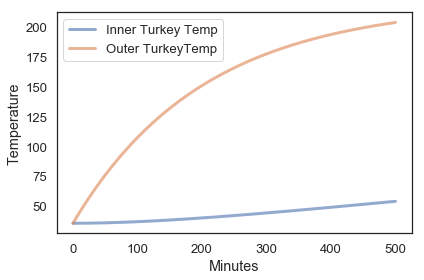

In [49]:
plot_results(results.T_inner, results.T_outer)

In [29]:
results

,T_inner,T_outer
0.000000,275.000000,275.000000
0.377674,275.000012,275.190971
4.154417,275.001471,277.080867
41.921843,275.140179,294.131965
180.000000,277.059365,335.006637
